# POPULARITY SCORE OF MUSIC TRACKS
- Adib Menchali, 771031
- Lorenzo Conti, 760361

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import seaborn as sns
%matplotlib inline
import plotly.io as pio
pio.templates.default = "plotly_dark"
sns.set_theme(context = "notebook", style = "darkgrid", font = "sans-serif", font_scale = 1, 
              color_codes = True, rc = None)
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


In [3]:
dataset = pd.read_csv("https://raw.githubusercontent.com/adibmenchali/ML_project/master/popularity_score_dataset.csv", index_col = [0]) # do not consider the first column since it
# is an index column.
df = dataset.copy() # make a copy of the dataset

In [4]:
df.shape # the dataset consists of 114000 rows, 20 columns.

(114000, 20)

In [5]:
df.head(10) # visualize the head of the dataset

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


### DESCRIPTION OF VARIABLES

- track_id: A unique identifier for each track.
- artists: the artists who performed the track. A single track can have multiple artists,
separated by a comma.
- album_name: The name of the album that the track appears on.
- track_name: The name of the track.
- popularity: The popularity score of the track, ranging from 0 to 100.
- duration_ms: The duration of the track in milliseconds.
- explicit: A binary value indicating whether the track contains explicit lyrics.
- danceability: A score indicating how danceable the track is, ranging from 0 to 1.
- energy: A score indicating the energy level of the track, ranging from 0 to 1.
- key: The key that the track is in (e.g., C, D, E, etc.).
- loudness: The loudness of the track in decibels (dB).
- mode: The mode of the track (major or minor).
- speechiness: A score indicating how much speech-like content is in the track, ranging
from 0 to 1.
- acousticness: A score indicating how acoustic the track is, ranging from 0 to 1.
- instrumentalness: A score indicating how instrumental the track is, ranging from 0 to 1.
- liveness: A score indicating the presence of an audience in the recording, ranging from 0
to 1.
- valence: A score indicating the positivity of the track, ranging from 0 to 1.
- tempo: The tempo of the track in beats per minute (BPM).
- time_signature: The time signature of the track (e.g., 4/4, 3/4, etc.).
- track_genre: The genre of the track (if available).

## Cleaning the data

In [6]:
print(df.isnull().sum())

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Since we only have one missing value for "artists", "album_name", "track_name", we drop rows containing missing values for one the three columns. It appears that the three missing values belong to the same entry and hence we deleted only one row and we are left with 113999.

In [7]:
# remove rows containing missing values
df.dropna(inplace=True)

In [8]:
df.describe() # visualize summary statistics for each variable

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [9]:
# check for duplicates
print(df.duplicated().sum()) # we have 450 duplicates
# a duplicate is just a song which appears twice. We drop duplicated rows.
df.drop_duplicates(inplace = True)

450


Removing outliers

In [10]:
import pandas as pd

# Select only the numerical columns from the DataFrame
columns = ['popularity','instrumentalness']
# Calculate the 0.05 and 0.95 quartiles for each numerical column
quartiles = df[columns].quantile([0.05, 0.95])

# Initialize a boolean mask for filtering
mask = pd.Series(True, index=df.index)

# Iterate over each numerical column
for column_name in columns:
    # Get the quartile values for the column
    q05 = quartiles[column_name].loc[0.05]
    q95 = quartiles[column_name].loc[0.95]
    
    # Update the mask to filter out rows with values outside the quartile range
    mask = mask & ((df[column_name] >= q05) & (df[column_name] <= q95))

# Apply the mask to filter the DataFrame
df = df[mask]

It looks like the same song can appear more than once. If we look carefully, we can see the same song can belong to more than one genre.

## SOME EXPLORATIVE PLOTS

Plotting the distribution of the Popularity variable

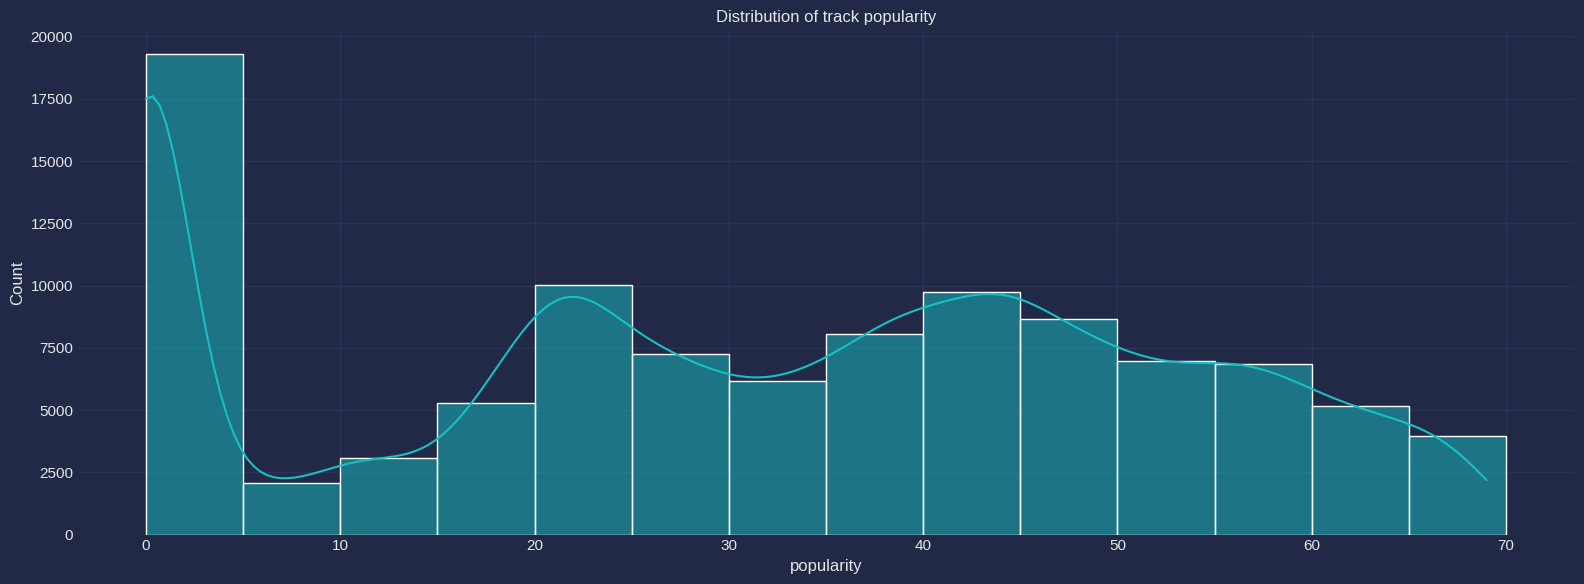

In [11]:
# we plot an histogram to see the distribution of the target variable popularity.
fig, ax = plt.subplots(figsize = (16,6))
sns.histplot(data = df, x = "popularity", binwidth = 5, kde = True, ax = ax)
ax.set_title("Distribution of track popularity")
fig.tight_layout()
fig.show()
# We can see that the bin with the highest number of observations is 0-5. The variable does not follow a normal
# distribution at all. There are few songs with an extremely high popularity score (> 80).

Top 10 genres by Popularity:

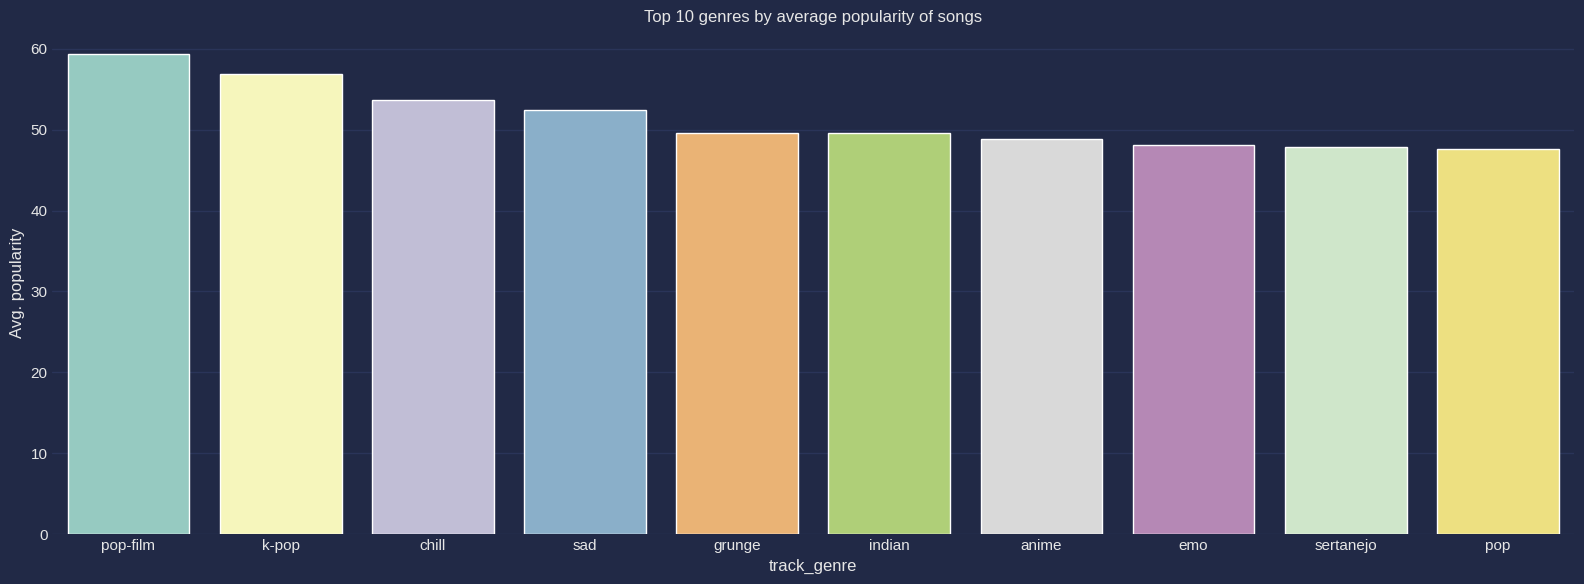

In [12]:
# top 10 genres by popularity of songs.
df_plt = dataset[["popularity", "track_genre"]]
df_plt_grouped = df_plt.groupby("track_genre").mean()["popularity"].sort_values(ascending = False).head(10).to_frame("Avg. popularity")
fig, ax = plt.subplots(figsize = (16,6))
color_map = plt.cm.get_cmap('Set3', 10)
sns.barplot(data = df_plt_grouped, 
            x = df_plt_grouped.index, 
            y = "Avg. popularity",
            ax = ax,
            palette=color_map.colors[:10])
ax.set_title("Top 10 genres by average popularity of songs")
fig.tight_layout()
fig.show()

Pop-film is the most popular genre in our dataset followed by k-pop and chill.

Top 10 Artists by Popularity:

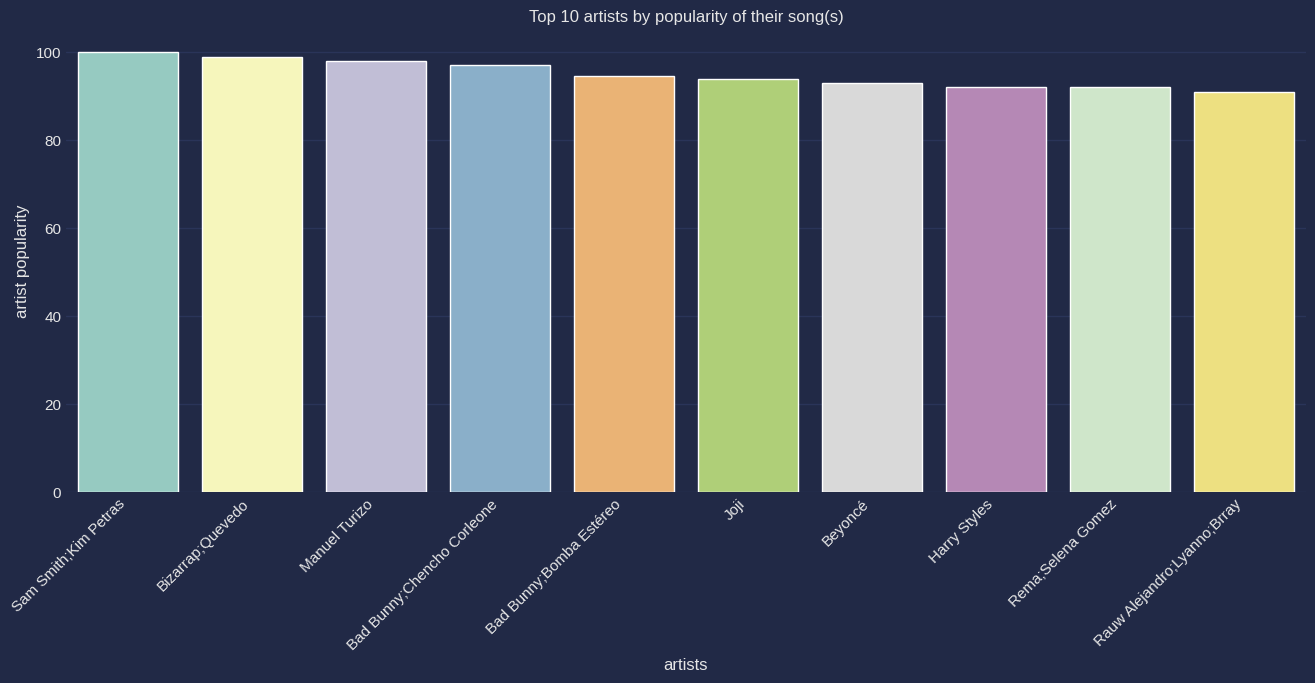

In [13]:
dataset_grouped = dataset.groupby("artists")["popularity"].mean().sort_values(ascending = False).head(10).to_frame("artist popularity")
dataset_grouped["track_genre"] = dataset.groupby("artists")["track_genre"].apply(lambda x: x.mode()[0][0])
fig, ax = plt.subplots(figsize = (16,6))
color_map = plt.cm.get_cmap('Set3', 10)
sns.barplot(x = dataset_grouped.index, y = "artist popularity", palette=color_map.colors[:10], data = dataset_grouped,dodge=False)
ax.set_title("Top 10 artists by popularity of their song(s)")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show()

Top 10 aritsts by number of songs:

In [14]:
# top 10 artists by number of songs present in the dataset.
dataset_grouped = df.groupby("artists")["popularity"].size().sort_values(ascending = False).head(10).to_frame("Occurrences")
px.bar(data_frame = dataset_grouped,
       y = dataset_grouped.index, 
       x = "Occurrences", 
       color = dataset_grouped.index, 
       title = "Top 10 artists by occurrences in the dataset")

Are explicit tracks more popular than non-explicit tracks on average?

<Axes: xlabel='explicit'>

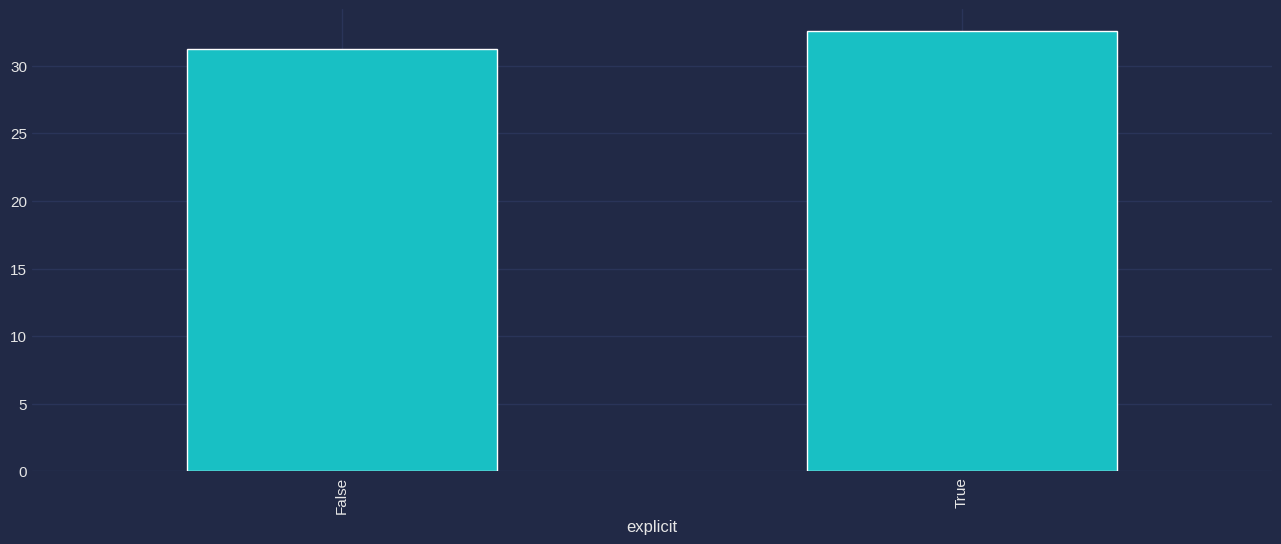

In [15]:
fig, ax = plt.subplots(figsize=(16, 6))
df.groupby('explicit')['popularity'].mean().plot(kind='bar')

Explicit tracks seem to be more popular than not.

In [16]:
# Verify if the difference is statistically significant.

from scipy.stats import ttest_ind

explicit_popularity = df[df['explicit'] == 1]['popularity'] # popularity of explicit tracks
non_explicit_popularity = df[df['explicit'] == 0]['popularity'] # popularity of non-explicit tracks

t_statistic, p_value = ttest_ind(explicit_popularity, non_explicit_popularity) # run a t-test to verify if the difference in average popularity is 
# statistically significant

if p_value < 0.05:
    print(f"p-value: {p_value}. The difference between explicit and non-explicit tracks is statistically significant.")
else:
    print(f"p-value: {p_value}.The difference between explicit and non-explicit tracks is not statistically significant.")

p-value: 8.915443968407916e-09. The difference between explicit and non-explicit tracks is statistically significant.


Plotting average popularity by Key: (We use stacked bars to showcase each Genre)

In [17]:
import plotly.express as px

# Group by key and track genre and calculate the mean popularity
popularity_by_key = dataset.groupby(['key', 'track_genre'])['popularity'].mean().reset_index()

# Sort by mean popularity in descending order
popularity_by_key = popularity_by_key.sort_values('popularity', ascending=False)

# Select the top 10 track genres
top_10_genres = popularity_by_key['track_genre'].unique()[:10]

# Create the bar chart using plotly express
fig = px.bar(popularity_by_key, x='key', y='popularity', color='track_genre')

# Update the visibility of traces
for trace in fig.data:
    if trace.name in top_10_genres:
        trace.visible = True
    else:
        trace.visible = 'legendonly'

fig.update_layout(
    title="Average Popularity by Key and Genre",
    xaxis_title="Key",
    yaxis_title="Average Popularity",
    font=dict(
        family="Arial",
        size=18,
        color="#7f7f7f"
    )
)

fig.show()


Plotting average popularity by Mode:

In [18]:
# plot popularity as a function of mode (1 major, 0 minor)
popularity_by_key = df.groupby('mode')['popularity'].mean().reset_index()

fig = px.bar(popularity_by_key, x='mode', y='popularity')
fig.update_layout(
    title="Average Popularity by Mode",
    xaxis_title="Mode",
    yaxis_title="Average Popularity",
    font=dict(
        family="Arial",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()

In [19]:
# Verify if the difference is statistically significant

from scipy.stats import ttest_ind


major_popularity = df[df['mode'] == 1]['popularity'] # tracks with major mode
minor_popularity = df[df['mode'] == 0]['popularity'] # tracks with minor mode

t_statistic, p_value = ttest_ind(major_popularity, minor_popularity)

if p_value < 0.05:
    print(f"p-value: {p_value}. The difference between explicit and non-explicit tracks is statistically significant.")
else:
    print(f"p-value: {p_value}.The difference between explicit and non-explicit tracks is not statistically significant.")

p-value: 0.001872695951827397. The difference between explicit and non-explicit tracks is statistically significant.


Plotting average popularity by Time Signature:

In [20]:
# plot popularity as a function of time signature.
popularity_by_key = df.groupby('time_signature')['popularity'].mean().reset_index()

# plot the data using plotly
fig = px.bar(popularity_by_key, x='time_signature', y='popularity')
fig.update_layout(
    title="Average Popularity by Time Signature",
    xaxis_title="Time Signature",
    yaxis_title="Average Popularity",
    font=dict(
        family="Arial",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()

TIME SIGNATURE 0 -> White or brown noise.

In [21]:
#Encoding the explicit column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['explicit'] = le.fit_transform(df['explicit'])

In [22]:
#Number of unique genres:
print(f'The number of unique genres in the column track_genre is {dataset.track_genre.unique()}.')

The number of unique genres in the column track_genre is ['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rocka

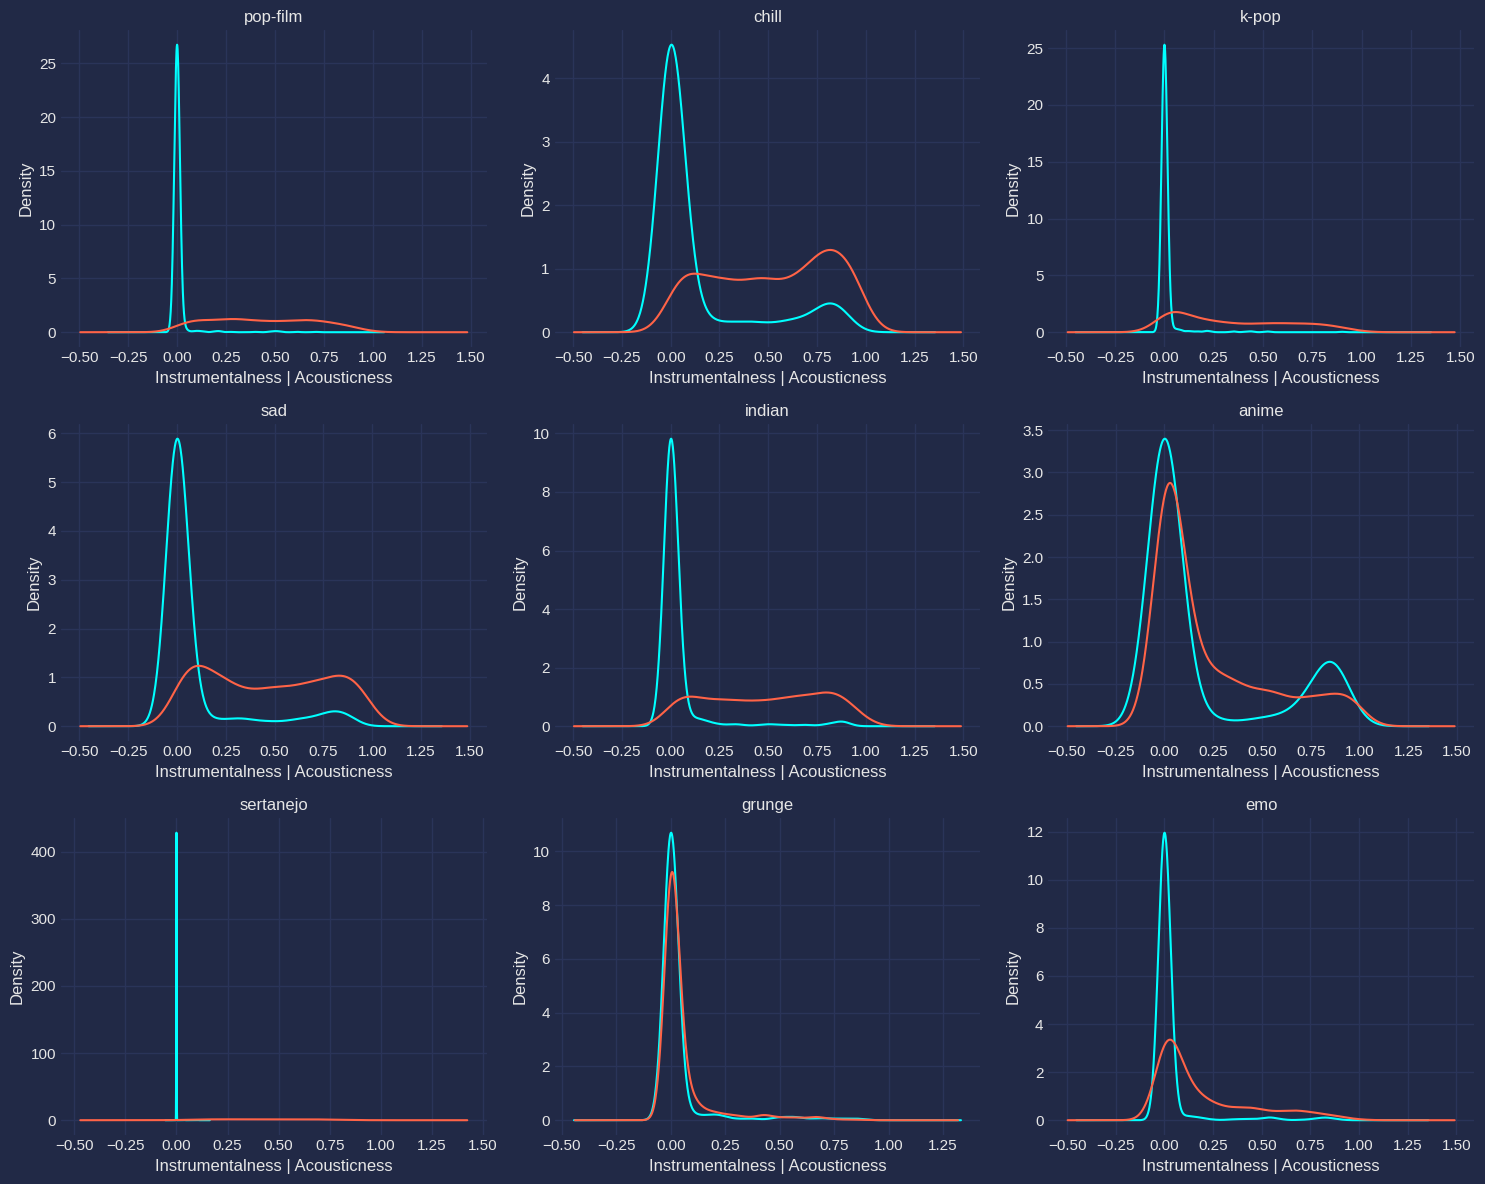

In [23]:
import matplotlib.pyplot as plt

# Get the top 9 genres based on popularity
top_9_genres = df.groupby('track_genre')['popularity'].mean().nlargest(9).index

# Group by track_genre and plot subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
colors = ['cyan', 'tomato']

for i, genre in enumerate(top_9_genres):
    row = i // 3
    col = i % 3

    for j, feature in enumerate(['instrumentalness', 'acousticness']):
        df[df['track_genre'] == genre][feature].plot(kind='kde', ax=axs[row][col], title=genre, color=colors[j])
        axs[row][col].set_xlabel('Instrumentalness | Acousticness')

plt.tight_layout()
plt.show()


In [24]:
df.track_genre.value_counts()

sertanejo    1000
mandopop      999
gospel        999
forro         998
malay         998
             ... 
classical     647
ambient       616
new-age       609
piano         559
sleep         552
Name: track_genre, Length: 114, dtype: int64

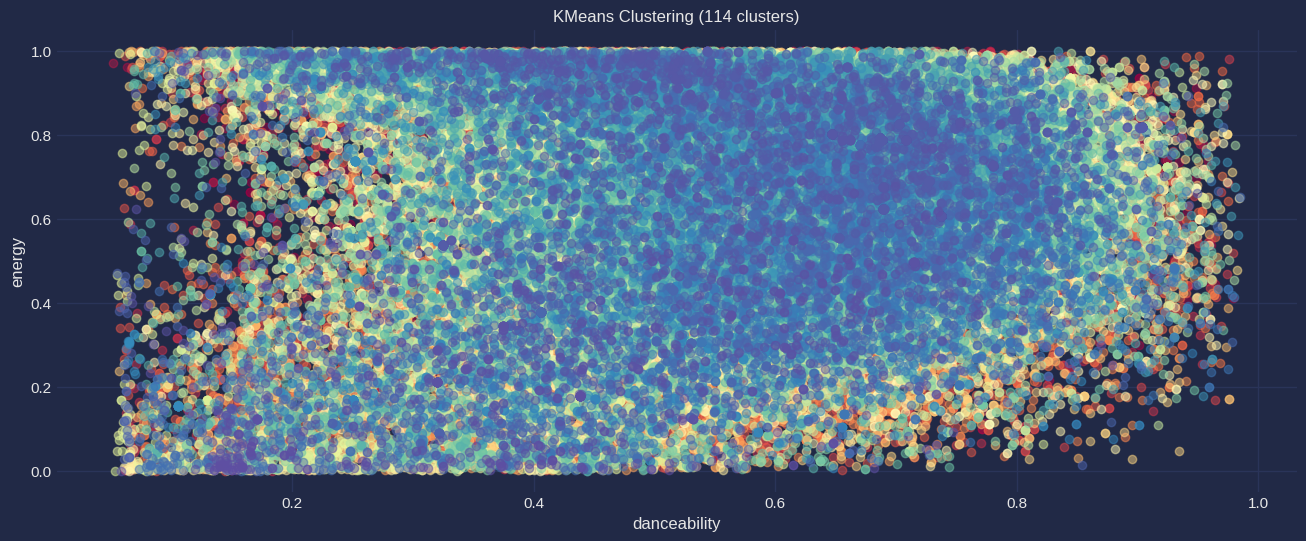

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Filter out tracks with danceability equal to 0
dataset = dataset[dataset['danceability'] != 0]

# Define features
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

# Create a new dataframe with only the features we want to use
df_features = dataset[features]
df_features.dropna(inplace=True)

# Create a KMeans object with 114 clusters
kmeans = KMeans(n_clusters=114)

# Fit the model
kmeans.fit(df_features)

# Get the labels for each data point
labels = kmeans.labels_

# Add the labels to the original dataframe
dataset['cluster'] = labels

# Compute the KMeans scores for each data point
kmeans_scores = kmeans.score(df_features)

# Choose the two features to represent the x and y axes
x_feature = 'danceability'
y_feature = 'energy'

# Generate a color map with a number of colors matching the number of clusters
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))

# Plot each data point with a color corresponding to its cluster label
fig, ax = plt.subplots(figsize=(16, 6))
for i, label in enumerate(set(labels)):
    cluster = dataset.loc[dataset['cluster'] == label]
    ax.scatter(cluster[x_feature], cluster[y_feature], c=colors[i], label=label, alpha=0.5)
ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
ax.set_title('KMeans Clustering (114 clusters)')
plt.show()


In [26]:
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder

# encode the track_genre column
le = LabelEncoder()
dataset['track_genre_encoded'] = le.fit_transform(dataset['track_genre'])
# compute the adjusted rand score
ari = adjusted_rand_score(dataset['track_genre_encoded'], dataset['cluster'])
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.010814895886274175


If the ARI is close to 1, it suggests that the clustering is highly accurate in terms of reproducing the track_genre labels. However, if the ARI is close to 0, it indicates that the clustering does not align well with the track_genre labels.

adjusted_rand_score compares the clustering result with the true labels based on the indices of the clusters and labels, regardless of the specific values. So even if the cluster numbers are different from the label encoded track_genre values, adjusted_rand_score will still be able to compare the two based on the similarity of their patterns, and give you a score that measures how well the clustering algorithm has captured the true structure of the data.

##Extracting the Genre influence and Artist influence features

In [27]:
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler to scale values to the range [0, 1]

# Group the data by genre and calculate the mean of the popularity score for each genre.
genre_popularity = df.groupby("track_genre")["popularity"].mean()
# Add the new column "genre_influence" to the dataframe.
df["genre_influence"] = df["track_genre"].map(genre_popularity)
# Group the data by artist and calculate the mean of the popularity score for each artist.
artist_popularity = df.groupby("artists")["popularity"].mean()
# Add the new column "artist_influence" to the dataframe.
df["artist_influence"] = df["artists"].map(artist_popularity)

# Scale the "artist_influence" and "genre_influence" columns to have values between 0 and 1
scaler = MinMaxScaler()
df[["genre_influence", "artist_influence"]] = scaler.fit_transform(df[["genre_influence", "artist_influence"]])

# display the head of the updated dataframe
df.head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,genre_influence,artist_influence
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.166,1,...,0.0763,0.924,0.000006,0.1010,0.267,77.489,4,acoustic,0.710072,0.622074
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.359,0,...,0.0557,0.210,0.000000,0.1170,0.120,76.332,4,acoustic,0.710072,0.826087
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,0,0.688,0.481,6,...,0.1050,0.289,0.000000,0.1890,0.666,98.017,4,acoustic,0.710072,0.699275
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,0,0.442,0.632,1,...,0.0295,0.426,0.004190,0.0735,0.196,78.899,4,acoustic,0.710072,0.735507
11,5ivF4eQBqJiVL5IAE9jRyl,Jason Mraz,Love Is a Four Letter Word,I Won't Give Up,69,240165,0,0.483,0.303,4,...,0.0429,0.694,0.000000,0.1150,0.139,133.406,3,acoustic,0.710072,0.355978
12,4ptDJbJl35d7gQfeNteBwp,Dan Berk,Solo,Solo,52,198712,0,0.489,0.314,7,...,0.0331,0.749,0.000000,0.1130,0.607,124.234,4,acoustic,0.710072,0.753623
13,0X9MxHR1rTkEHDjp95F2OO,Anna Hamilton,Bad Liar,Bad Liar,62,248448,0,0.691,0.234,3,...,0.0285,0.777,0.000000,0.1200,0.209,87.103,4,acoustic,0.710072,0.772947
14,4LbWtBkN82ZRhz9jqzgrb3,Chord Overstreet;Deepend,Hold On (Remix),Hold On - Remix,56,188133,0,0.755,0.780,2,...,0.0327,0.124,0.000028,0.1210,0.387,120.004,4,acoustic,0.710072,0.811594
15,1KHdq8NK9QxnGjdXb55NiG,Landon Pigg,The Boy Who Never,Falling in Love at a Coffee Shop,58,244986,0,0.489,0.561,4,...,0.0274,0.200,0.000046,0.1790,0.238,83.457,3,acoustic,0.710072,0.818841
16,6xKeQgzfjixSUld14qUezm,Andrew Foy;Renee Foy,ily (i love you baby),ily (i love you baby),56,129750,0,0.706,0.112,2,...,0.0391,0.827,0.000004,0.1250,0.414,110.154,4,acoustic,0.710072,0.554627


Aggregaring our data based on Genre (by combining the tracks with different genres) as well as Popularity (by choosing keeping the maximum value)

In [28]:
# Filter rows with duplicate track IDs and different popularity values
duplicates = df[df.duplicated(subset='track_id', keep=False)]
duplicates = duplicates.groupby('track_id').agg({'popularity': 'max', 'track_genre': list}).reset_index()

df = pd.merge(df, duplicates, on='track_id', how='left')
df['popularity'] = np.where(df['popularity_y'].notna(), df['popularity_y'], df['popularity_x'])
df['track_genre'] = np.where(df['track_genre_y'].notna(), df['track_genre_y'], df['track_genre_x'])
df = df.drop(['popularity_x', 'track_genre_x', 'popularity_y', 'track_genre_y'], axis=1)
df.drop_duplicates(subset=['track_id'], keep='first', inplace=True)

df.insert(3, 'popularity', df.pop('popularity')) 

In [29]:
df.drop(columns = ["track_id"], axis = 1, inplace = True) # drop the track id column

We drop the id of each track as we believe that the popularity of a song will not be influenced by its id.

Extracing a new boolean variable for whether the track has multiple artists or not.

In [30]:
# Create a new column "featuring" and set default value to False
df['featuring'] = False

# Update the "featuring" column to True for rows where ";" is present in the "artists" column
df.loc[df['artists'].str.contains(';'), 'featuring'] = True


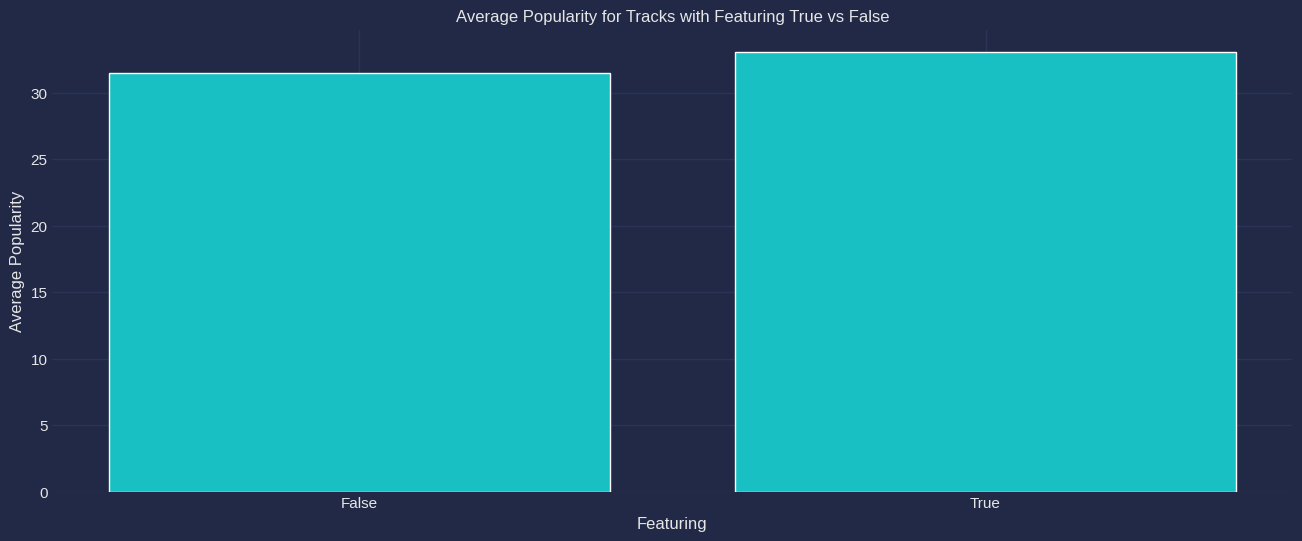

In [31]:
# Group by the "featuring" column and calculate the average popularity
avg_pop_by_featuring = df.groupby('featuring')['popularity'].mean()

# Plot the average rating
fig, ax = plt.subplots(figsize=(16, 6))
plt.bar(avg_pop_by_featuring.index.astype(str), avg_pop_by_featuring)
plt.xlabel('Featuring')
plt.ylabel('Average Popularity')
plt.title('Average Popularity for Tracks with Featuring True vs False')
plt.show()


Tracks that feature more than one artist seem to be more popular on average.

##Feature engineering

###Topic modeling

In [32]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# preprocess the text data
stop_words = set(stopwords.words(['english','spanish'])) # use stopwords from the english and spanish languages
stop_words.update(["vivo", "remastered","song","ya","de","original","live","acoustic","version","single","mix","th","edition",
                   "deluxe","year","hit","song","ao","vol","top","recording","en"]) # update the list of stopwords by adding some that appear frequently 
                   # in our dataset
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', text) # regular expression: replace everything that is not text with ""
    text = text.lower() # convert everything to lowercase
    words = nltk.word_tokenize(text) # break the test into tokens
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and not word.isdigit()] # convert a word to its lemma version if the word
    # is neither a stopword nor a digit.
    return ' '.join(words)

df['clean_album'] = df['album_name'].apply(preprocess) # apply the preprocessing steps that we defined above to the column "album_name"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [33]:
# create a document-term matrix from the column "clean_album"
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(df['clean_album'])

# train the LDA model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(doc_term_matrix)

# print the 10 topics and the top 10 words for each topic
for i, topic in enumerate(lda_model.components_):
    feature_names = vectorizer.get_feature_names_out()
    print(feature_names[topic.argmax()])
    print('\n')
    #print(f'Top 10 words for topic #{i}:')
    print([feature_names[j] for j in topic.argsort()[:-11:-1]])
    print('\n')

music


['music', 'classic', 'anniversary', 'dance', 'home', 'amor', 'essential', 'house', 'holiday', 'summer']


christmas


['christmas', 'love', 'ep', 'hit', 'best', 'world', 'rock', 'back', 'baby', 'na']


best


['best', 'soundtrack', 'exitos', 'soul', 'die', 'know', 'grandes', 'fire', 'vida', 'eu']


party


['party', 'like', 'da', 'boy', 'ano', 'hit', 'feel', 'new', 'fall', 'ii']


pt


['pt', 'stico', 'tango', 'ac', 'piano', 'album', 'light', 'remixes', 'side', 'mind']


day


['day', 'session', 'vibe', 'dj', 'remix', 'death', 'chill', 'cover', 'big', 'classic']


song


['song', 'country', 'christmas', 'rhyme', 'dream', 'happy', 'heart', 'pov', 'nursery', 'want']


time


['time', 'cast', 'hit', 'one', 'good', 'greatest', 'broadway', 'go', 'special', 'part']


pop


['pop', 'halloween', 'best', 'rock', 'perreo', 'em', 'tune', 'kid', 'collection', 'party']


soundtrack


['soundtrack', 'motion', 'picture', 'hit', 'sound', 'feat', 'complete', 'blue', 'night', 'music']




Generating word cloud based on topic modeling

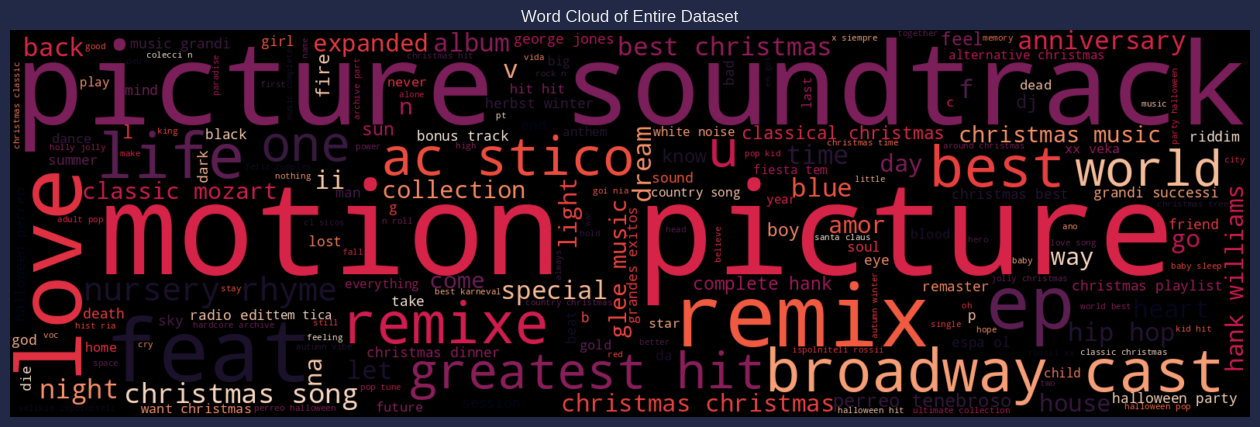

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(df['clean_album'])

# Create a word cloud
wordcloud = WordCloud(width=1600, height=500, background_color='black',colormap='rocket').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(16, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Entire Dataset')
plt.axis('off')
plt.show()


###Extracting playlist and soundtrack genres:

In [35]:
unique_genres = list(set(df.explode("track_genre"))) # genres of each song are stored in a list and they are separated by "-".
clean_unique_genres = [genre.lower().replace('-', ' ') for genre in unique_genres] # replace "-" with "" for each unique genre.

playlist_keywords = ['hit', 'chill', 'study', 'lofi', 'collection', 'christmas', 'spring', 'summer', 'winter', 'fall', 'autumn', 'top','mix','2023','2022','2021','best']

def check_playlist(clean_album, clean_unique_genres, keywords):
    for genre in clean_unique_genres:
        if genre in clean_album:
            return True
    for keyword in keywords:
        if keyword in clean_album: # if any of the keywords is in the cleaned album name, then the album belongs to a playlist.
            return True
    return False

df['playlist'] = df['clean_album'].apply(lambda x: check_playlist(x.lower(), clean_unique_genres, playlist_keywords)) # add a binary column "playlist"
# that contains 1 if the album is in a playlist, 0 otherwise.
df['soundtrack'] = df['clean_album'].str.contains('soundtrack|ost|film|movie|motion|picture', case=False) # add a binary column "sountrack" that 
# contains 1 if the album name contains any of the following strings: "sountrack", "ost", "film", "movie", "motion", "picture".


Top 10 Genres used in soundtracks

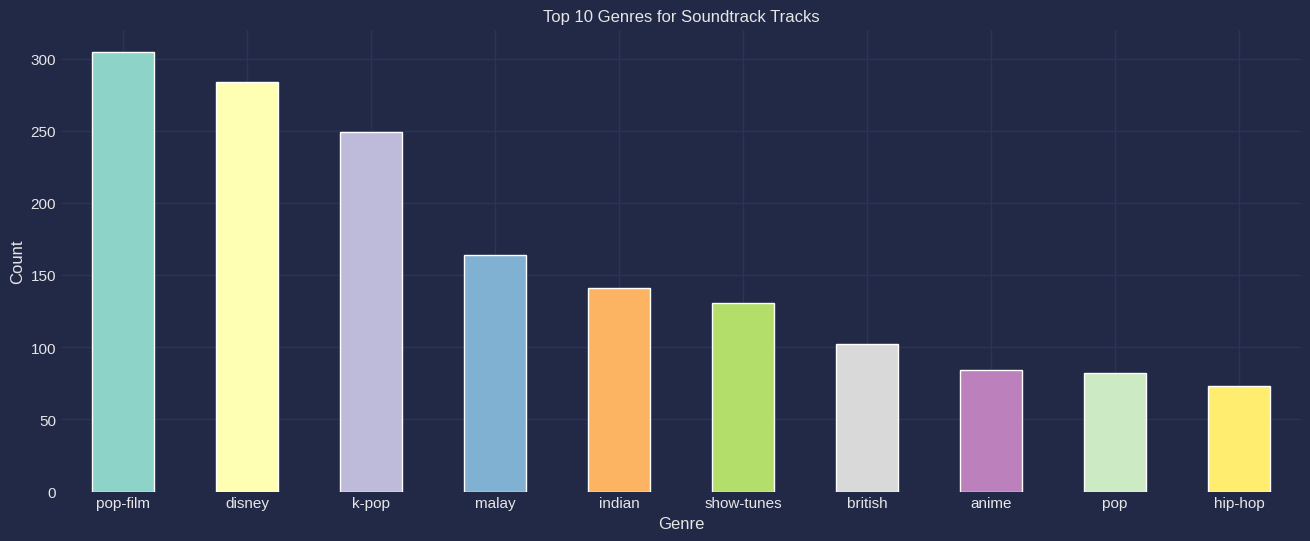

In [36]:
# Filter the DataFrame for soundtrack tracks
soundtrack_tracks = df[df['soundtrack'] == True]

# Explode the track_genre column to create individual rows for each genre
exploded_genres = soundtrack_tracks.explode('track_genre')

# Group the data by genre and count the occurrences
genre_counts = exploded_genres['track_genre'].value_counts()

# Select the top 10 genres
top_10_genres = genre_counts.head(10)

# Generate a color map with a number of colors matching the number of genres
color_map = plt.cm.get_cmap('Set3', len(top_10_genres))

# Plot a bar chart of the top 10 genres with color coding
fig, ax = plt.subplots(figsize=(16, 6))
top_10_genres.plot(kind='bar', ax=ax, color=[color_map(i) for i in range(len(top_10_genres))])
ax.set_xlabel('Genre')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')
ax.set_ylabel('Count')
ax.set_title('Top 10 Genres for Soundtrack Tracks')
plt.show()

Pop-Film, Disney, and K-pop seem to be the most frequently featured genres in soundtracks.

Top 10 Genres added to playlists

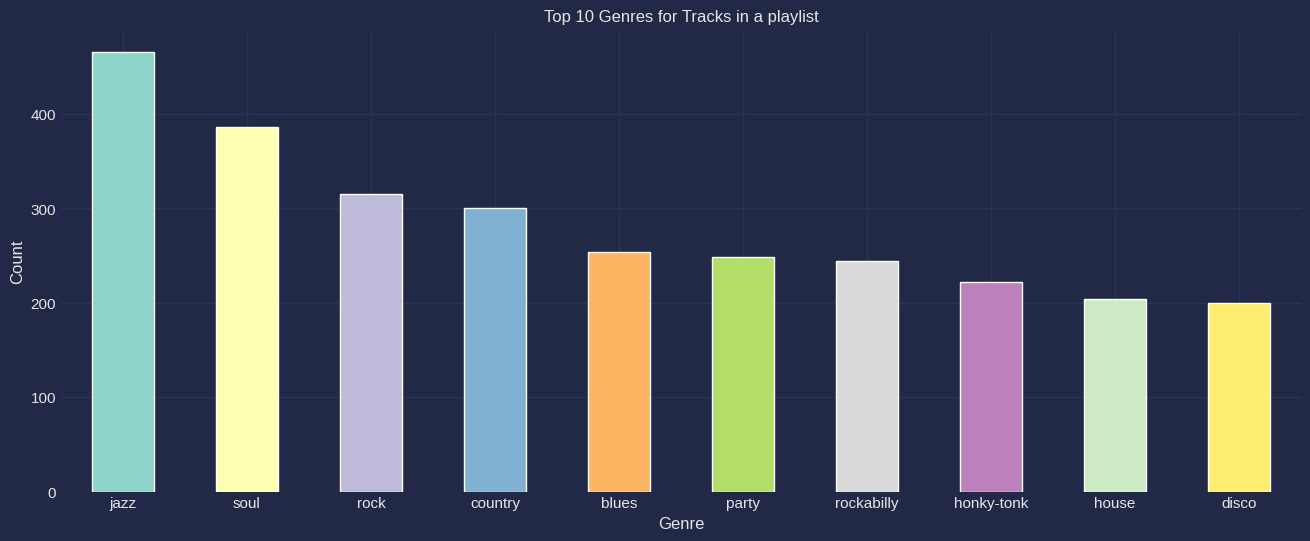

In [37]:
# Filter the DataFrame for soundtrack tracks
playlist_tracks = df[df['playlist'] == True]

# Explode the track_genre column to create individual rows for each genre
exploded_genres = playlist_tracks.explode('track_genre')

# Group the data by genre and count the occurrences
genre_counts = exploded_genres['track_genre'].value_counts()

# Select the top 10 genres
top_10_genres = genre_counts.head(10)

# Generate a color map with a number of colors matching the number of genres
color_map = plt.cm.get_cmap('Set3', len(top_10_genres))

# Plot a bar chart of the top 10 genres with color coding
fig, ax = plt.subplots(figsize=(16, 6))
top_10_genres.plot(kind='bar', ax=ax, color=[color_map(i) for i in range(len(top_10_genres))])
ax.set_xlabel('Genre')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')
ax.set_ylabel('Count')
ax.set_title('Top 10 Genres for Tracks in a playlist')
plt.show()

Jazz, Soul, and Rock are the genres that are added to playlists the most.

###Correlation matrices

We will proceed with two different approaches:

1st approach:
Using all the dataset, with artist_influence and genre_influence as independent variables.

2nd approach:
Filtering out the popular artists, using track features as independent variables.

We will run the following predictive models for each approach: MLR, RF, ANN

In [38]:
popularity_column = df.pop('popularity')  # Remove the "popularity" column
df.insert(3, 'popularity', popularity_column)  # Insert the "popularity" column at the desired position (index 2)


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_influence,artist_influence,featuring,playlist,soundtrack
popularity,1.000000,-0.005458,0.031601,0.040276,0.010617,0.002852,0.061974,-0.014413,-0.048829,-0.025315,-0.098464,0.000086,-0.031806,0.013476,0.039265,0.598978,0.887548,0.036079,-0.194750,0.088634
duration_ms,-0.005458,1.000000,-0.067542,-0.078065,0.060947,0.009937,-0.012201,-0.038403,-0.061708,-0.103446,0.146697,0.013168,-0.154433,0.024469,0.017613,-0.006439,-0.004342,0.018808,-0.028121,-0.001670
explicit,0.031601,-0.067542,1.000000,0.110297,0.093006,0.005330,0.093926,-0.034089,0.332670,-0.080573,-0.090762,0.041938,-0.018179,-0.012336,0.033102,0.012182,0.031910,0.037472,-0.026324,-0.031959
danceability,0.040276,-0.078065,0.110297,1.000000,0.095879,0.028594,0.199537,-0.063173,0.100337,-0.134581,-0.115473,-0.135745,0.474547,-0.062473,0.187348,0.025490,0.041736,0.104625,0.022002,-0.026547
energy,0.010617,0.060947,0.093006,0.095879,1.000000,0.041833,0.755928,-0.076103,0.133463,-0.713193,-0.073837,0.176715,0.220821,0.244559,0.175426,0.014969,0.011096,-0.022191,-0.048170,-0.061375
key,0.002852,0.009937,0.005330,0.028594,0.041833,1.000000,0.029075,-0.141854,0.015783,-0.041448,0.000816,-0.002637,0.022833,0.005780,0.011249,0.001920,0.002512,0.011104,-0.000438,-0.007894
loudness,0.061974,-0.012201,0.093926,0.199537,0.755928,0.029075,1.000000,-0.036248,0.030642,-0.553283,-0.308313,0.066434,0.233090,0.211823,0.174386,0.075186,0.066674,0.008884,-0.024954,-0.056884
mode,-0.014413,-0.038403,-0.034089,-0.063173,-0.076103,-0.141854,-0.036248,1.000000,-0.042337,0.092548,-0.060042,0.017688,0.025170,-0.000579,-0.024746,0.016679,-0.014884,-0.059793,0.029664,-0.011393
speechiness,-0.048829,-0.061708,0.332670,0.100337,0.133463,0.015783,0.030642,-0.042337,1.000000,0.023971,-0.081578,0.231046,0.018777,-0.009111,-0.020060,-0.073125,-0.049263,0.021349,-0.045326,-0.022100
acousticness,-0.025315,-0.103446,-0.080573,-0.134581,-0.713193,-0.041448,-0.553283,0.092548,0.023971,1.000000,-0.015815,0.001464,-0.058390,-0.208590,-0.168946,-0.011689,-0.020974,-0.002160,0.023147,0.053105


Text(0.5, 1.0, 'Correlation matrix')

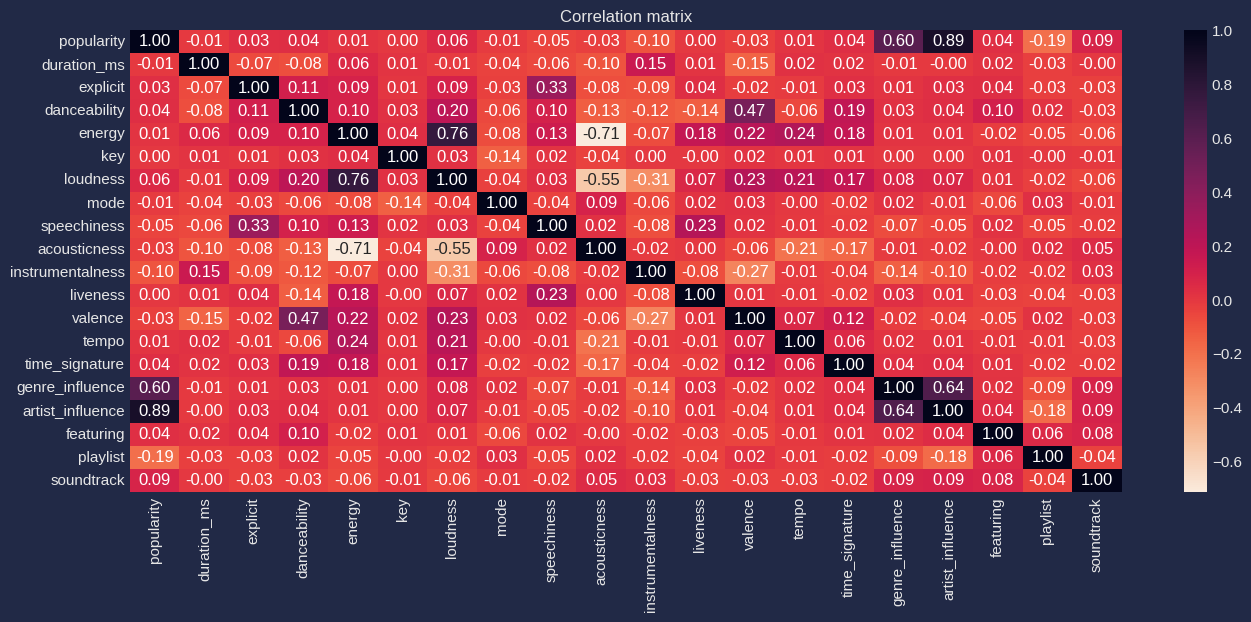

In [39]:
# visualize a correlation matrix of the dataset.
corr_dataset = df.corr(numeric_only = True)
display(corr_dataset)
# plot the correlation matrix using a heatmap
fig, ax = plt.subplots(figsize = (16,6))
sns.heatmap(corr_dataset, annot = True, cmap = sns.color_palette("rocket_r", as_cmap=True),fmt=".2f")
ax.set_title("Correlation matrix")

- What else can we observe from the correlation heatmap?
- There is a weak (both positive and negative) correlation between track features and popularity.
- There is a positive correlation of 0.47 between danceability and valence. This makes sense since a song which is danceable is more likely to communicate positive vibes to the person listening to it.
- There is a positive correlation of 0.76 between energy and loudness and a negative correlation of -0.71 between energy and acousticness. They both make sense since a song with a high energy level is likely to be associated with a high degree of loudness. On the other hand, if the energy transmitted by the song tends to increase, its acoustic score tends to decrease.
- There is a negative correlation of -0.55 between loudness and acousticness and a negative correlation of -0.31 between loudness and instrumentalness. A loud track is likely to be associated with a low acoustic score and if the degree of loudness of a song tends to increase, the amount of vocals in it tends increase as well (so its instrumentalness tends to decrease).
- There is a negative correlation of -0.27 between instrumentalness and valence. This means that if the amount of vocals in a song tends to decrease (so as instrumentalness tends to increase), the positivity score of the track tends to decrease as well.

Popularity seems to be very highly correlated with Artist influence with Genre influence coming second.

Correlation matrix (Popularity < 10):
We choose 10 as a threshold to minimize the correlation with the Artist_influence variable as an effort to increase the correlation of other music features


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_influence,artist_influence,featuring,playlist,soundtrack
popularity,1.000000,0.186847,-0.068983,0.154258,0.028213,0.017425,-0.122987,-0.087738,0.074929,-0.117625,0.361686,-0.052996,-0.002841,0.027267,0.033364,-0.181188,0.199178,-0.002534,-0.180027,0.087897
duration_ms,0.186847,1.000000,-0.051321,-0.067633,0.068782,0.001422,-0.088114,-0.067302,-0.038578,-0.126769,0.307951,-0.022732,-0.183178,0.019624,0.009438,-0.083924,0.030344,0.026913,-0.104518,0.011230
explicit,-0.068983,-0.051321,1.000000,0.181135,0.106207,0.040883,0.154516,-0.049883,0.231723,-0.164030,-0.107579,0.018539,0.005024,0.017788,0.046183,0.047719,-0.022639,0.069840,-0.037648,0.003844
danceability,0.154258,-0.067633,0.181135,1.000000,0.372306,0.048871,0.409796,-0.067068,0.197755,-0.424942,-0.153146,-0.087575,0.545548,-0.000237,0.260339,0.087138,0.067368,0.077821,-0.046674,-0.022880
energy,0.028213,0.068782,0.106207,0.372306,1.000000,0.069673,0.768148,-0.046809,0.147968,-0.774961,-0.101423,0.130640,0.362118,0.245954,0.243362,0.086847,0.116976,-0.022098,-0.086606,0.010861
key,0.017425,0.001422,0.040883,0.048871,0.069673,1.000000,0.038584,-0.147532,0.057218,-0.059598,-0.009981,-0.012055,0.045867,0.031248,0.027539,0.025990,-0.017947,0.015600,-0.014464,0.004170
loudness,-0.122987,-0.088114,0.154516,0.409796,0.768148,0.038584,1.000000,0.004077,0.087820,-0.607642,-0.388047,0.054790,0.359008,0.190857,0.187456,0.110829,0.084252,-0.075693,0.023807,-0.017580
mode,-0.087738,-0.067302,-0.049883,-0.067068,-0.046809,-0.147532,0.004077,1.000000,-0.077332,0.066050,-0.066430,-0.005890,0.033109,0.021535,-0.009903,0.078579,0.012590,-0.059022,0.119757,-0.002746
speechiness,0.074929,-0.038578,0.231723,0.197755,0.147968,0.057218,0.087820,-0.077332,1.000000,-0.120211,-0.056490,0.075637,0.071223,0.102688,0.069296,-0.032325,-0.005589,0.053944,-0.097129,0.005547
acousticness,-0.117625,-0.126769,-0.164030,-0.424942,-0.774961,-0.059598,-0.607642,0.066050,-0.120211,1.000000,0.034354,-0.021764,-0.243254,-0.229219,-0.237518,-0.071226,-0.112484,-0.004010,0.099634,-0.017982


Text(0.5, 1.0, 'Correlation matrix for the least popular songs')

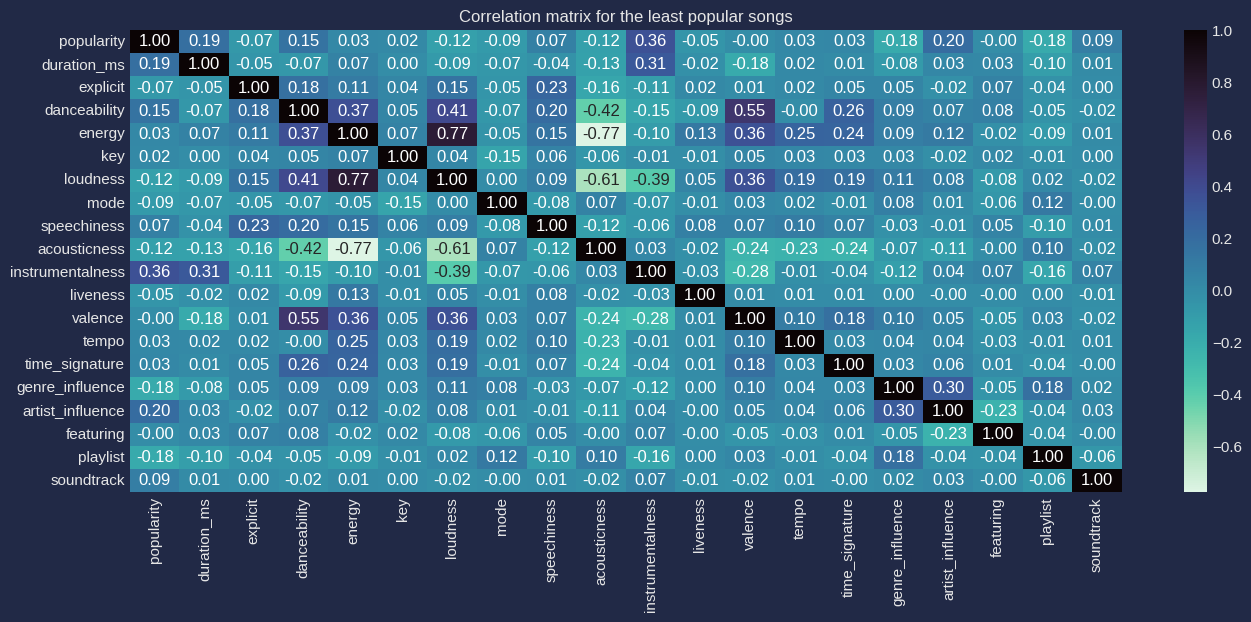

In [40]:
df_filtered = df.loc[df['popularity']<10] # consider songs with popularity score less than 10

# visualize a correlation matrix of the dataset.
corr_dataset = df_filtered.corr(numeric_only = True)
display(corr_dataset)
# plot the correlation matrix using a heatmap
fig, ax = plt.subplots(figsize = (16,6))
sns.heatmap(corr_dataset, annot = True, cmap = sns.color_palette("mako_r", as_cmap=True), fmt=".2f")
ax.set_title("Correlation matrix for the least popular songs")

Here we notice that using the second approach and by minimizing the artist influence, the correlation between Popularity and the music features improve slightly with Instrumentalness having the highest correlation of all the variables at 0.36.

In [41]:
df_filtered.shape # how many songs does the dataframe of least popular songs contain?

(12912, 25)

Determining significant categorical variables:

In [42]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# categorical columns are: mode, key, time_signature, playlist, soundtrack, explicit.
df["mode"] = df["mode"].astype("category")
df["key"] = df["key"].astype("category")
df["time_signature"] = df["time_signature"].astype("category")
model = ols('popularity ~ mode + key + time_signature + explicit + soundtrack + playlist + featuring', data=df).fit() # build a model that
# predicts popularity using categorical variables.
anova_table = sm.stats.anova_lm(model, typ=2) # run anova test
print(anova_table.to_string(float_format=lambda x: '{:.3f}'.format(x))) # display the results of anova test.

                     sum_sq        df        F  PR(>F)
mode                128.535     1.000    0.364   0.546
key               14524.747    11.000    3.744   0.000
time_signature   132036.129     4.000   93.597   0.000
soundtrack       195195.953     1.000  553.480   0.000
playlist        1110749.918     1.000 3149.542   0.000
featuring         45620.893     1.000  129.358   0.000
explicit          25210.460     1.000   71.484   0.000
Residual       28745805.862 81509.000      NaN     NaN


All the categorical variables except for Mode are significant.

In [43]:
# run the anova test on the dataframe of least popular songs. The rest of the code is the same
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_filtered["mode"] = df_filtered["mode"].astype("category")
df_filtered["key"] = df_filtered["key"].astype("category")
df_filtered["time_signature"] = df_filtered["time_signature"].astype("category")
model = ols('popularity ~ mode + key + time_signature + explicit + soundtrack + playlist + featuring', data=df_filtered).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table.to_string(float_format=lambda x: '{:.3f}'.format(x)))

                  sum_sq        df       F  PR(>F)
mode             391.400     1.000  62.781   0.000
key              323.444    11.000   4.716   0.000
time_signature   114.257     4.000   4.582   0.001
soundtrack       504.774     1.000  80.966   0.000
playlist        2301.212     1.000 369.116   0.000
featuring          8.661     1.000   1.389   0.239
explicit         600.134     1.000  96.262   0.000
Residual       80367.522 12891.000     NaN     NaN


All the categorical variables except for Featuring are significant.

##Building the models

Model 1: Using the original dataframe.

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Define the independent and dependent variables
X = df[['genre_influence', 'artist_influence','key','time_signature','explicit','soundtrack','playlist']] # these are the relevant variables
# if we want to predict the popularity score of tracks contained in df. 
y = df['popularity']

# Scale the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create the random forest model and fit it to the scaled training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Use the trained model to make predictions on the scaled test set
rf_preds = rf_model.predict(X_test)

# Create the linear regression model and fit it to the scaled training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Use the trained model to make predictions on the scaled test set
lr_preds = lr_model.predict(X_test)

# Create the XGBoost model and fit it to the training data
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
xgb_preds = xgb_model.predict(X_test)

# Compute MSE and RMSE and R-squared for linear regression model
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_preds)
print(f"Linear Regression MSE: {lr_mse:.3f}")
print(f"Linear Regression RMSE: {lr_rmse:.3f}")
print(f"Linear Regression R^2: {lr_r2:.3f}")

# Compute MSE and RMSE and R-squared for random forest model
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_preds)
print(f"Random Forest MSE: {rf_mse:.3f}")
print(f"Random Forest RMSE: {rf_rmse:.3f}")
print(f"Random Forest R^2: {rf_r2:.3f}")

# Compute MSE and RMSE and R-squared for XGBoost model
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_preds)
print(f"XGBoost MSE: {xgb_mse:.3f}")
print(f"XGBoost RMSE: {xgb_rmse:.3f}")
print(f"XGBoost R^2: {xgb_r2:.3f}")

Linear Regression MSE: 78.774
Linear Regression RMSE: 8.875
Linear Regression R^2: 0.789
Random Forest MSE: 86.870
Random Forest RMSE: 9.320
Random Forest R^2: 0.767
XGBoost MSE: 71.769
XGBoost RMSE: 8.472
XGBoost R^2: 0.808


The first approach performs very well with the 3 different algorithms, XGBoost produces the best performance with Linear Regression as a close second. Given the negligible difference, we'd prefer to use LR in this case as it performs greatly without the need for intensive computation.

Model 2: Using the filtered dataframe with popularity less than 10.

In [45]:
# Define the independent and dependent variables
X = df_filtered[['genre_influence','mode','key','time_signature','explicit','soundtrack','playlist']] # these are the relevant variables if we want
# to predict the popularity score of tracks contained in df_filtered (with popularity < 10)
y = df_filtered['popularity']

# Scale the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create the random forest model and fit it to the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
rf_preds = rf_model.predict(X_test)

# Create the linear regression model and fit it to the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
lr_preds = lr_model.predict(X_test)

# Create the XGBoost model and fit it to the training data
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
xgb_preds = xgb_model.predict(X_test)

# Compute MSE and RMSE and R-squared for linear regression model
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_preds)
print(f"Linear Regression MSE: {lr_mse:.3f}")
print(f"Linear Regression RMSE: {lr_rmse:.3f}")
print(f"Linear Regression R^2: {lr_r2:.3f}")

# Compute MSE and RMSE and R-squared for random forest model
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_preds)
print(f"Random Forest MSE: {rf_mse:.3f}")
print(f"Random Forest RMSE: {rf_rmse:.3f}")
print(f"Random Forest R^2: {rf_r2:.3f}")

# Compute MSE and RMSE and R-squared for XGBoost model
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_preds)
print(f"XGBoost MSE: {xgb_mse:.3f}")
print(f"XGBoost RMSE: {xgb_rmse:.3f}")
print(f"XGBoost R^2: {xgb_r2:.3f}")

Linear Regression MSE: 6.396
Linear Regression RMSE: 2.529
Linear Regression R^2: 0.056
Random Forest MSE: 2.885
Random Forest RMSE: 1.699
Random Forest R^2: 0.574
XGBoost MSE: 2.729
XGBoost RMSE: 1.652
XGBoost R^2: 0.597


This approach performs worse than the initial one, XGBoost does the best again and Linear Regression struggles as expected given the small correlations.

Using ANN:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

X = df_filtered[['genre_influence', 'mode', 'key', 'time_signature', 'explicit', 'soundtrack', 'playlist']]
y = df_filtered['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

loss = model.evaluate(X_test_scaled, y_test)
print(f"Mean Squared Error: {loss:.3f}")
